In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# I. Dataset preparation

In [2]:
df=pd.read_csv('Jim_Beam_Brands.csv')

df.head()

,Date,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold
0,09/28/2015,Maker's Mark,750,16.79,25.19,12
1,08/27/2014,Laphroaig Quarter Cask,750,29.39,44.09,6
2,01/25/2012,Jim Beam,1750,18.37,27.55,2
3,01/21/2014,Pinnacle Vodka,1750,12.08,18.12,6
4,06/02/2014,Beam's 8 Star Bl Whiskey,200,1.17,1.76,48


##### The dataframe consists of 6 columns:
- `Date`: date that bottles were sold to retailers.
- `Item Description`: names of the sold bottles.
- `Bottle Volume`: volume of each bottle.
- `State Bottle Cost`: cost the Iowa State pays to Jim Beam Brands for sold bottles.
- `State Bottle Retail`: money the State receives from selling bottles to retailers.
- `Bottle Sold`: number of bottles sold to retailers.
 

In [3]:
# turn `Date`to `datetime`
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold
0,2015-09-28,Maker's Mark,750,16.79,25.19,12
1,2014-08-27,Laphroaig Quarter Cask,750,29.39,44.09,6
2,2012-01-25,Jim Beam,1750,18.37,27.55,2
3,2014-01-21,Pinnacle Vodka,1750,12.08,18.12,6
4,2014-06-02,Beam's 8 Star Bl Whiskey,200,1.17,1.76,48


##### Let's check if some days are missing.

In [4]:
# sort the date in correct order
df.sort_values('Date',ignore_index=True,inplace=True)
df.head()

,Date,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold
0,2012-01-03,Canadian Club Whisky,1000,9.34,14.01,12
1,2012-01-03,Skinnygirl Margarita,750,7.69,11.53,3
2,2012-01-03,Kessler Blend Whiskey,1750,11.01,16.52,6
3,2012-01-03,Dekuyper Buttershots Schnapps,750,6.30,9.45,12
4,2012-01-03,Cruzan Raspberry Rum,750,6.38,9.57,3


In [5]:
# collect all missing date by comparing `Date`with a `date_range`
missing_dates=pd.date_range(start='2012-01-03',end='2022-02-28').difference(df.Date)
missing_dates

DatetimeIndex(['2012-01-06', '2012-01-07', '2012-01-08', '2012-01-13',
               '2012-01-14', '2012-01-15', '2012-01-20', '2012-01-21',
               '2012-01-22', '2012-01-28',
               ...
               '2021-12-18', '2021-12-25', '2022-01-01', '2022-01-08',
               '2022-01-15', '2022-01-22', '2022-01-29', '2022-02-05',
               '2022-02-12', '2022-02-19'],
              dtype='datetime64[ns]', length=1206, freq=None)

In [6]:
# check the weekday
missing_dates.strftime('%A').value_counts()

Saturday     500
Sunday       487
Friday       171
Monday        24
Thursday      12
Wednesday      7
Tuesday        5
dtype: int64

##### The missing dates fall mostly on Saturday and Sunday. There are also another weekdays as well. This fact is due to the scheduled working day of Iowa Alcoholic Beverages Division, which maintained a monopoly on the wholesaling of alcoholic beverages in the state.

##### I focus on the monthly revenue of Jim Beam Brands, so this is not a big deal.

In [7]:
# compute revenue for each sold bottle
df['Revenue']=df['State Bottle Cost']*df['Bottles Sold']
df=df.round(2)
df.head()

,Date,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Revenue
0,2012-01-03,Canadian Club Whisky,1000,9.34,14.01,12,112.08
1,2012-01-03,Skinnygirl Margarita,750,7.69,11.53,3,23.07
2,2012-01-03,Kessler Blend Whiskey,1750,11.01,16.52,6,66.06
3,2012-01-03,Dekuyper Buttershots Schnapps,750,6.30,9.45,12,75.60
4,2012-01-03,Cruzan Raspberry Rum,750,6.38,9.57,3,19.14


In [8]:
# compute revenue for each month

monthly_revenue=df.resample('M',on='Date')['Revenue'].sum().sort_index()
monthly_revenue

Date
2012-01-31    1020862.23
2012-02-29    1021760.22
2012-03-31    1006995.51
2012-04-30    1108185.43
2012-05-31    1218569.42
                 ...    
2021-10-31    2387219.60
2021-11-30    1811414.32
2021-12-31    2155507.30
2022-01-31    1422067.00
2022-02-28    1458941.92
Freq: M, Name: Revenue, Length: 122, dtype: float64

# II. Exploratory Data Analysis

## 1. Plot of monthly revenue

Text(0.5, 1.0, 'Monthly revenue of Jim Band Brands from 01.2012 to 02.2022')

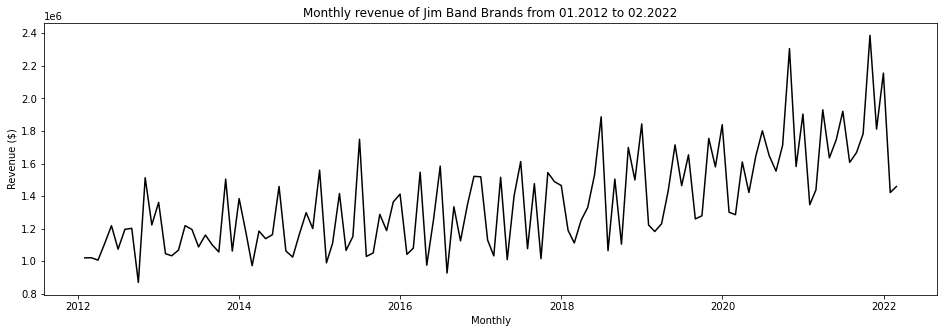

In [9]:
plt.figure(figsize=(16,5))

plt.plot(monthly_revenue.index,monthly_revenue.values, color='black')
plt.xlabel('Monthly')
plt.ylabel('Revenue ($)')
plt.title('Monthly revenue of Jim Band Brands from 01.2012 to 02.2022')

##### I will now compare each year to see if I can find a pattern

In [10]:
# make `monthly_revenue` into a dataframe
monthly_revenue=monthly_revenue.reset_index()

In [11]:
# add year and month columns
monthly_revenue['year']=[d.year for d in monthly_revenue.Date]
monthly_revenue['month'] = [d.strftime('%b') for d in monthly_revenue.Date]
monthly_revenue.head()

,Date,Revenue,year,month
0,2012-01-31,1020862.23,2012,Jan
1,2012-02-29,1021760.22,2012,Feb
2,2012-03-31,1006995.51,2012,Mar
3,2012-04-30,1108185.43,2012,Apr
4,2012-05-31,1218569.42,2012,May


In [12]:
# collect all years
years=monthly_revenue['year'].unique()
years

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

## 2. Seasonal plot

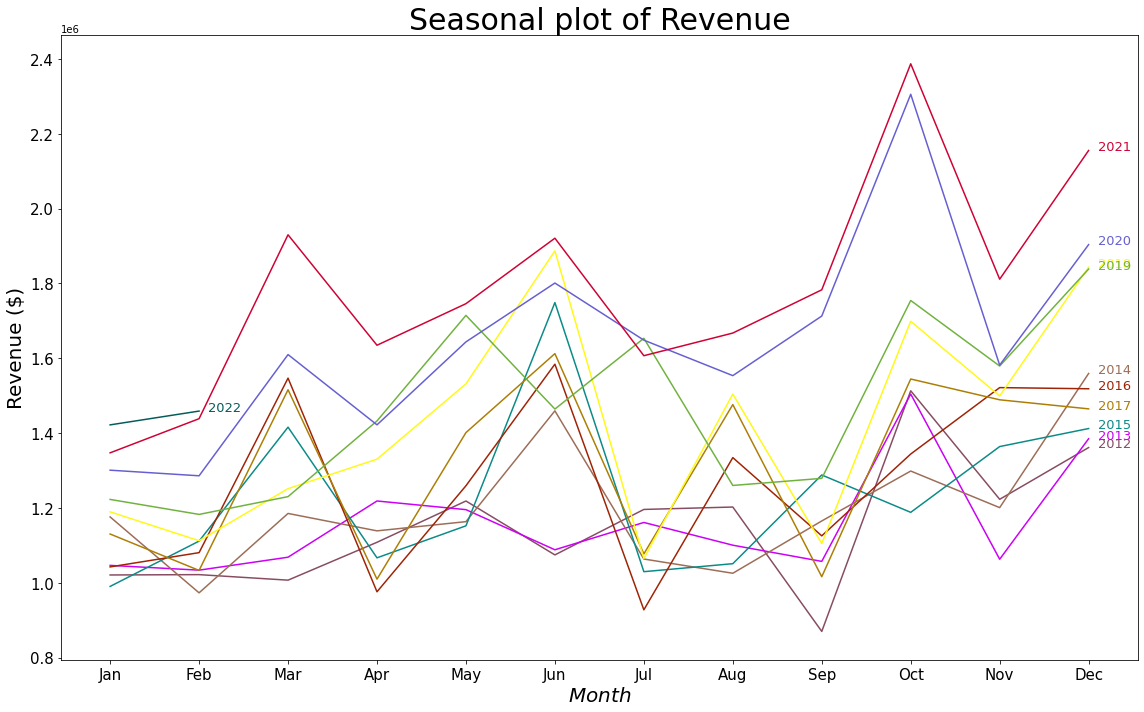

In [13]:
# choose colors
np.random.seed(105)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# plot
plt.figure(figsize=(16,10))
for i, y in enumerate(years):       
    plt.plot('month', 'Revenue', data=monthly_revenue.loc[monthly_revenue.year==y, :], color=mycolors[i], label=y)
    plt.text(monthly_revenue.loc[monthly_revenue.year==y, :].shape[0]-.9, monthly_revenue.loc[monthly_revenue.year==y, 'Revenue'][-1:].values[0], y, fontsize=13, color=mycolors[i])

# add some details

plt.ylabel("Revenue ($)",fontsize=20)
plt.xlabel('$Month$',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Seasonal plot of Revenue", fontsize=30)


plt.tight_layout()

##### It seems that our data has some patterns, as we can easily see peaks in March and October, whereas troughs are April, July and November.

## 3. Box plots

#### In this step, I will take a look at the distribution of revenue, both year-wise and month-wise. 

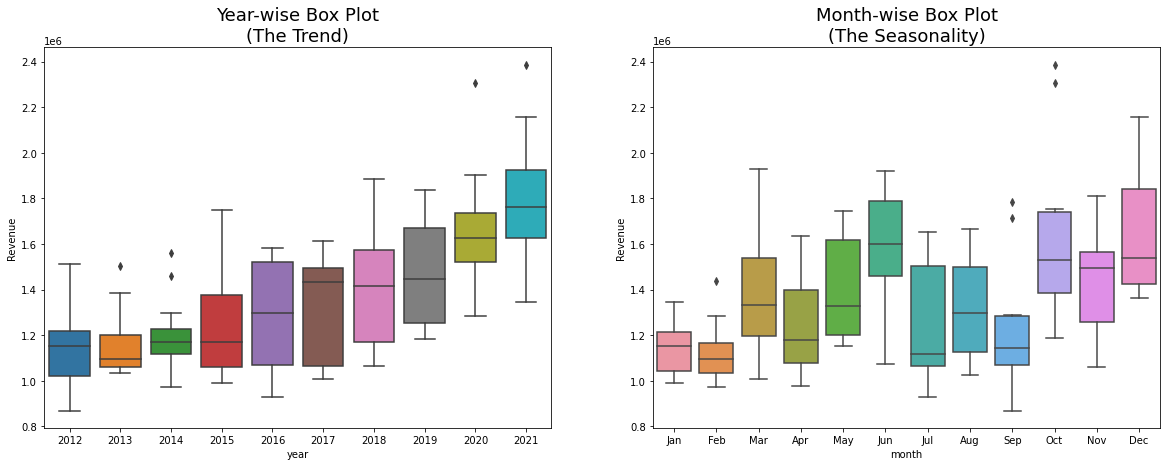

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))
sns.boxplot(x='year', y='Revenue', data=monthly_revenue.loc[monthly_revenue.year.isin(list(np.arange(2012,2022))), :], ax=axes[0])
sns.boxplot(x='month', y='Revenue', data=monthly_revenue.loc[monthly_revenue.year.isin(list(np.arange(2012,2022))), :],ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

##### Most of 10 data pieces in year-wise box plots are skrew, except 2020 and 2021, which seems to be near normal distributed. However, there are outliers there and these factors will affect the accuray of predictions, which we will see later.

# III. Properties

In [15]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## 1. Decomposition

In [16]:
# set `Date`to be indices
monthly_revenue.set_index('Date',inplace=True)
monthly_revenue.head()

,Revenue,year,month
Date,,,
2012-01-31,1020862.23,2012,Jan
2012-02-29,1021760.22,2012,Feb
2012-03-31,1006995.51,2012,Mar
2012-04-30,1108185.43,2012,Apr
2012-05-31,1218569.42,2012,May


In [17]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(monthly_revenue['Revenue'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(monthly_revenue['Revenue'], model='additive', extrapolate_trend='freq')

##### For each decomposition, we have 4 corresponding Series: `observed`, `trend`, `seasonal`and `resid`.

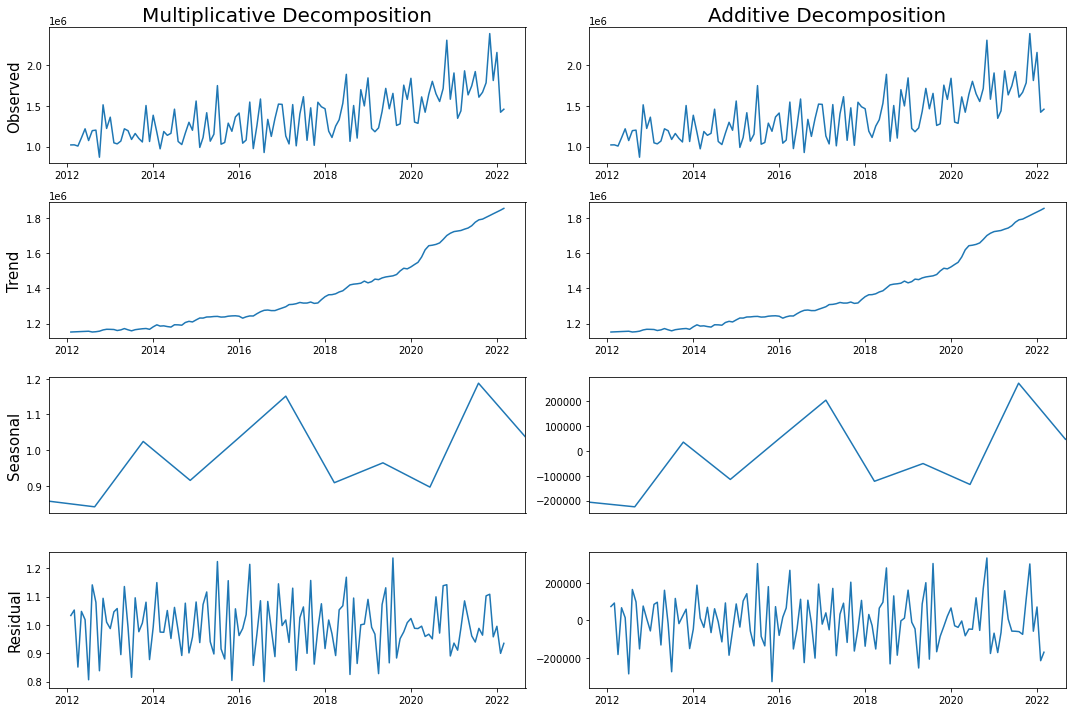

In [18]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(15,10))

axes[0,0].plot(result_mul.observed.index,result_mul.observed.values)
axes[0,0].set_title('Multiplicative Decomposition',fontsize=20)
axes[0,0].set_ylabel('Observed',fontsize=15)
axes[1,0].plot(result_mul.trend.index,result_mul.trend.values)
axes[1,0].set_ylabel('Trend',fontsize=15)
#axes[2,0].plot(result_mul.seasonal.index,result_mul.seasonal.values)
axes[2,0].plot(result_mul.seasonal.index,result_mul.seasonal.values)
axes[2,0].set_xlim(result_mul.seasonal.index[0],result_mul.seasonal.index[10])
axes[2,0].get_xaxis().set_visible(False)
axes[2,0].set_ylabel('Seasonal',fontsize=15)
axes[3,0].plot(result_mul.resid.index,result_mul.resid.values)
axes[3,0].set_ylabel('Residual',fontsize=15)

axes[0,1].plot(result_add.observed.index,result_add.observed.values)
axes[0,1].set_title('Additive Decomposition',fontsize=20)
axes[1,1].plot(result_add.trend.index,result_add.trend.values)
axes[2,1].plot(result_add.seasonal.index,result_add.seasonal.values)
axes[2,1].set_xlim(result_add.seasonal.index[0],result_add.seasonal.index[10])
axes[2,1].get_xaxis().set_visible(False)
axes[3,1].plot(result_add.resid.index,result_add.resid.values)

plt.tight_layout()

##### Both decompositions are quite similar, with a bit difference in Residual.

## 2. Stationary

##### Our dataset is luckily easy to see a trend. For the sake of completeness, I also give a check of stationary property here.

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
monthly_revenue.head()

,Revenue,year,month
Date,,,
2012-01-31,1020862.23,2012,Jan
2012-02-29,1021760.22,2012,Feb
2012-03-31,1006995.51,2012,Mar
2012-04-30,1108185.43,2012,Apr
2012-05-31,1218569.42,2012,May


In [21]:
result=adfuller(monthly_revenue.Revenue.values,autolag='AIC')
result

(3.0805356401222777,
 1.0,
 12,
 109,
 {'1%': -3.49181775886872,
  '5%': -2.8884437992971588,
  '10%': -2.5811201893779985},
 2887.5915336671433)

In [22]:
print('ADF Statistic:',result[0])

print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(key,',',value)

ADF Statistic: 3.0805356401222777
p-value: 1.0
Critial Values:
1% , -3.49181775886872
Critial Values:
5% , -2.8884437992971588
Critial Values:
10% , -2.5811201893779985


##### Since `p-value`is greater than `0.05`and `ADF Statistic`is higher than any of `Critical Values`, our time series is not stationary.

# IV. Forecast

##### Since the time series has seasonality, I will use two models, SARIMA and Prophet, to make forecasts.

## 1. SARIMA model

In [23]:
!pip install pmdarima
import pmdarima as pm

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


##### Our data here is just the `Revenue` Series from aboved `monthly_revenue` DataFrame.

In [24]:
data=monthly_revenue.drop(['year','month'],axis=1)
data.head()

,Revenue
Date,
2012-01-31,1020862.23
2012-02-29,1021760.22
2012-03-31,1006995.51
2012-04-30,1108185.43
2012-05-31,1218569.42


##### To implement the SARIMA model, I use `auto_arima()`, which uses a stepwise approach to search multiple combinations of `p`, `d`, `q` parameters and chooses the best model that has the least AIC.

##### Here `p` is the order of the AR term, `q` is the order of the MA term, `d` is the number of differencing required to make the time series stationary. We also set `seasonal=True`, the frequency `m=12` for month wise series and enforce `D=1`.

##### Our first attempt is to forecast with a training and test sets.

### a. Ratio training - test : 80-20

In [25]:
train_len = int(0.8*len(data))
train = data.iloc[:train_len]
test = data.iloc[train_len:]

In [28]:
# Run auto-ARIMA
smodel_1 = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_1.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2268.171, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2274.904, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2266.443, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2275.045, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2280.888, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2265.447, Time=0.08 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2266.383, Time=0.20 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2268.288, Time=0.44 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=2268.950, Time=0.10 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2267.647, Time=0.15 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2275.764, Time=0.10 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=2269.238, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=2276.501, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,1,0)[12] intercept
Total fit time: 2.187 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   97
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood               -1129.724
Date:                            Sun, 01 May 2022   AIC                           2265.447
Time:                                    18:21:03   BIC                           2272.775
Sample:                                         0   HQIC                          2268.395
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.772e+04   1.43e+04      4.725      0.000    3.96e+04    9.58e+04
ar.L1         -0.2755      0.036     -7.577      0.000      -0.347      -0.204
sigma2      1.816e+10      0.005   3.61e+12      0.000    1.82e+10    1.82e+10
===================================================================================
Ljung-Box (L1) (Q):                   6.09   Jarque-Bera (JB):                 2.70
Prob(Q):                              0.01   Prob(JB):                         0.26
Heteroskedasticity (H):               1.36   Skew:                             0.16
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.69e+30. Standard errors may be unstable.
"""

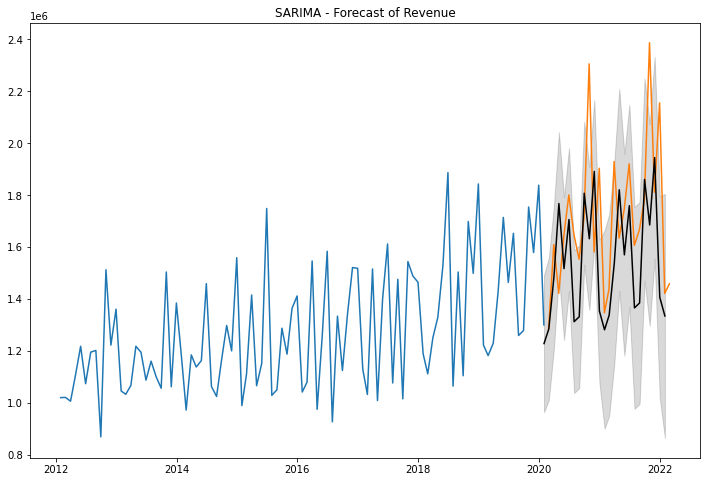

In [29]:
# forecast
fitted, confint = smodel_1.predict(n_periods=len(test), return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = len(test), freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# plot
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(test)
plt.plot(fitted_series, color='black')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast of Revenue")
plt.show()

##### accuracy metrics

In [30]:
# accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    
    
    return(pd.DataFrame([mape,me,mae,mpe,rmse], index=['MAPE','ME','MAE','MPE','RMSE'], columns=['Error']).round(5))

forecast_accuracy(fitted_series.values, test.values)

,Error
MAPE,0.17107
ME,-166525.81902
MAE,305934.81011
MPE,-0.07582
RMSE,388148.26417


In [31]:
print('RMSE error:',forecast_accuracy(fitted_series.values, test.values).loc['RMSE','Error'])
print('Mean value of test set:',test['Revenue'].mean())
print('Error/ Mean (%):',forecast_accuracy(fitted_series.values, test.values).loc['RMSE','Error']/test['Revenue'].mean()*100)

RMSE error: 388148.26417
Mean value of test set: 1711207.0347999698
Error/ Mean (%): 22.68271788722352


##### The ratio `RMSE Error/Mean` is around 22.6 %, not too good. This is due to the fact that our training set has no information on the year 2021 or 2022, which have significant outliers. Let's see what happens if we add them to training set.

### b. Ratio training - test set: 90-10

In [32]:
train_len = int(.9*len(data))
train = data.iloc[:train_len]
test = data.iloc[train_len:]

In [33]:
# auto-ARIMA
smodel_2 = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5, m=12, # max p,q = 3,3
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_2.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2608.483, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2610.552, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2606.843, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2608.212, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2621.917, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2606.752, Time=0.06 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2606.551, Time=0.22 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2607.796, Time=0.43 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=2606.772, Time=0.47 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=2605.105, Time=1.82 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=3.59 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=2605.995, Time=1.05 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=2606.921, Time=1.20 sec
 ARIMA(2,0,0)(1,1,2)[12] intercept   : AIC=2606.713, Time=1.39 sec
 ARIMA(1,0,1)(1,1,2)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  109
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1294.998
Date:                                 Sun, 01 May 2022   AIC                           2603.995
Time:                                         18:23:38   BIC                           2622.018
Sample:                                              0   HQIC                          2611.283
                                                 - 109                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.981e+04   2.88e+04      2.773      0.006    2.34e+04    1.36e+05
ar.L1         -0.5401      0.429     -1.258      0.208      -1.381       0.301
ma.L1          0.3510      0.440      0.798      0.425      -0.512       1.214
ar.S.L12       0.5650      0.160      3.532      0.000       0.251       0.879
ma.S.L12      -0.7594      0.213     -3.573      0.000      -1.176      -0.343
ma.S.L24      -0.0869      0.081     -1.075      0.282      -0.245       0.072
sigma2      2.557e+10      0.049   5.21e+11      0.000    2.56e+10    2.56e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):                 9.90
Prob(Q):                              0.22   Prob(JB):                         0.01
Heteroskedasticity (H):               1.75   Skew:                             0.47
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.46e+28. Standard errors may be unstable.
"""

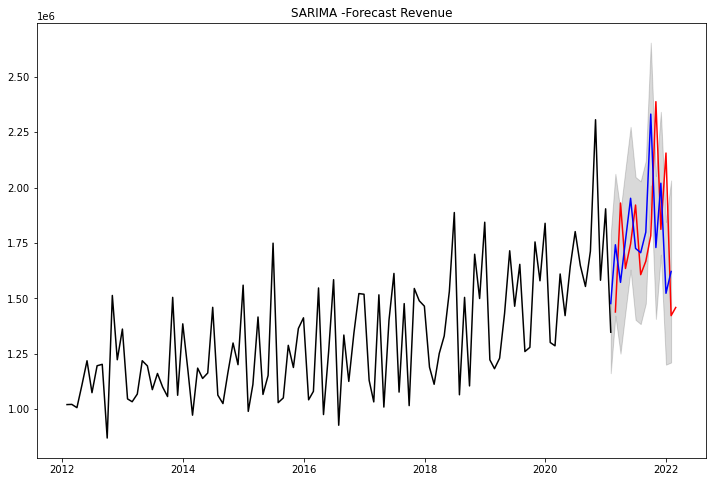

In [34]:
# forecast
fitted, confint = smodel_2.predict(n_periods=len(test), return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = len(test), freq='M')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# plot
plt.figure(figsize=(12,8))
plt.plot(train,color='black')
plt.plot(test,color='red')
plt.plot(fitted_series, color='blue')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA -Forecast Revenue")
plt.show()

In [35]:
forecast_accuracy(fitted_series.values, test.values)

,Error
MAPE,0.15400
ME,-465.16796
MAE,273066.45215
MPE,0.02214
RMSE,349836.56099


##### The prediction plots in this case seem to fit the test one much better. Obviously, all accuracy metrics are significantly improved!

## 2. Using Prophet model

##### We first install necessary packages

In [36]:
!pip install pystan==2.19.1.1

     |████████████████████████████████| 67.3 MB 20.8 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [37]:
!pip install prophet
from prophet import Prophet

     |████████████████████████████████| 65 kB 6.7 MB/s 
     |████████████████████████████████| 49 kB 12.5 MB/s 
     |████████████████████████████████| 47 kB 10.0 MB/s 
     |████████████████████████████████| 172 kB 47.3 MB/s 
     |████████████████████████████████| 1.8 MB 44.2 MB/s 
     |████████████████████████████████| 5.4 MB 47.7 MB/s 
  ERROR: Command errored out with exit status 1:
   command: /root/venv/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-1x769xmk/prophet/setup.py'"'"'; __file__='"'"'/tmp/pip-install-1x769xmk/prophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-fd4yrjee
       cwd: /tmp/pip-install-1x769xmk/prophet/
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/prophet
 

In [38]:
# check back our data
data.head()

,Revenue
Date,
2012-01-31,1020862.23
2012-02-29,1021760.22
2012-03-31,1006995.51
2012-04-30,1108185.43
2012-05-31,1218569.42


In [40]:
# create two columns `ds`and `y` and store in a new dataframe called `df`
df=data.reset_index()
df.columns=['ds','y']
df.head()

,ds,y
0,2012-01-31,1020862.23
1,2012-02-29,1021760.22
2,2012-03-31,1006995.51
3,2012-04-30,1108185.43
4,2012-05-31,1218569.42


##### Our forecast will be make based on a training set of 90 % of our `df`

In [91]:
train_len = int(.9*len(df))
train = df.iloc[:train_len]
test = df.iloc[train_len:]
print('Length of train set:',len(train))
train.head()

Length of train set: 109


,ds,y
0,2012-01-31,1020862.23
1,2012-02-29,1021760.22
2,2012-03-31,1006995.51
3,2012-04-30,1108185.43
4,2012-05-31,1218569.42


### a. Forecast

In [42]:
m=Prophet()
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
# create a placeholder of future predictions
future=m.make_future_dataframe(periods=len(test),freq='M')
future.head()

,ds
0,2012-01-31
1,2012-02-29
2,2012-03-31
3,2012-04-30
4,2012-05-31


In [49]:
# make forecast
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,1.095518e+06,7.735523e+05,1.102058e+06,1.095518e+06,1.095518e+06,-152134.705304,-152134.705304,-152134.705304,-152134.705304,-152134.705304,-152134.705304,0.0,0.0,0.0,9.433838e+05
1,2012-02-29,1.098580e+06,7.625124e+05,1.104229e+06,1.098580e+06,1.098580e+06,-174031.276103,-174031.276103,-174031.276103,-174031.276103,-174031.276103,-174031.276103,0.0,0.0,0.0,9.245484e+05
2,2012-03-31,1.101852e+06,1.021644e+06,1.365880e+06,1.101852e+06,1.101852e+06,96784.259614,96784.259614,96784.259614,96784.259614,96784.259614,96784.259614,0.0,0.0,0.0,1.198636e+06
3,2012-04-30,1.105019e+06,8.268924e+05,1.155276e+06,1.105019e+06,1.105019e+06,-123401.169498,-123401.169498,-123401.169498,-123401.169498,-123401.169498,-123401.169498,0.0,0.0,0.0,9.816176e+05
4,2012-05-31,1.108291e+06,1.016954e+06,1.344686e+06,1.108291e+06,1.108291e+06,67608.641688,67608.641688,67608.641688,67608.641688,67608.641688,67608.641688,0.0,0.0,0.0,1.175900e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2021-10-31,1.678889e+06,1.775740e+06,2.115519e+06,1.677120e+06,1.680631e+06,271380.543799,271380.543799,271380.543799,271380.543799,271380.543799,271380.543799,0.0,0.0,0.0,1.950269e+06
118,2021-11-30,1.685719e+06,1.570536e+06,1.899671e+06,1.683697e+06,1.687793e+06,52865.059669,52865.059669,52865.059669,52865.059669,52865.059669,52865.059669,0.0,0.0,0.0,1.738584e+06
119,2021-12-31,1.692777e+06,1.761138e+06,2.108314e+06,1.690384e+06,1.695233e+06,240548.076070,240548.076070,240548.076070,240548.076070,240548.076070,240548.076070,0.0,0.0,0.0,1.933325e+06
120,2022-01-31,1.699835e+06,1.360192e+06,1.697806e+06,1.697109e+06,1.702633e+06,-171239.618819,-171239.618819,-171239.618819,-171239.618819,-171239.618819,-171239.618819,0.0,0.0,0.0,1.528596e+06


In [47]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

##### We are only interested in the following columns

In [50]:
forecast[['ds', 'yhat_lower', 'yhat_upper','yhat']].head()

,ds,yhat_lower,yhat_upper,yhat
0,2012-01-31,7.735523e+05,1.102058e+06,9.433838e+05
1,2012-02-29,7.625124e+05,1.104229e+06,9.245484e+05
2,2012-03-31,1.021644e+06,1.365880e+06,1.198636e+06
3,2012-04-30,8.268924e+05,1.155276e+06,9.816176e+05
4,2012-05-31,1.016954e+06,1.344686e+06,1.175900e+06


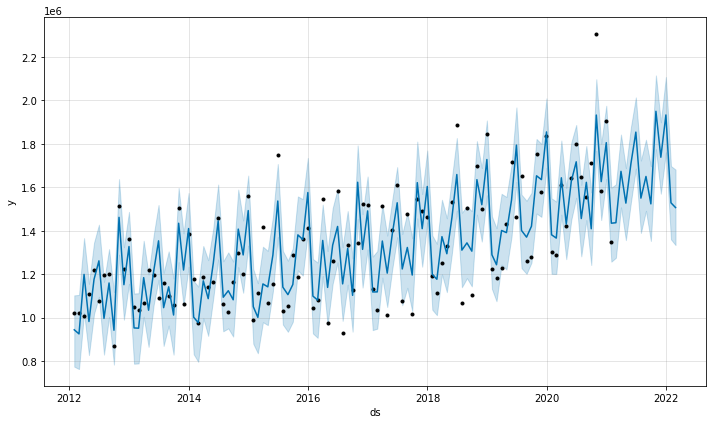

In [51]:
# plot
m.plot(forecast);

<AxesSubplot:xlabel='ds'>

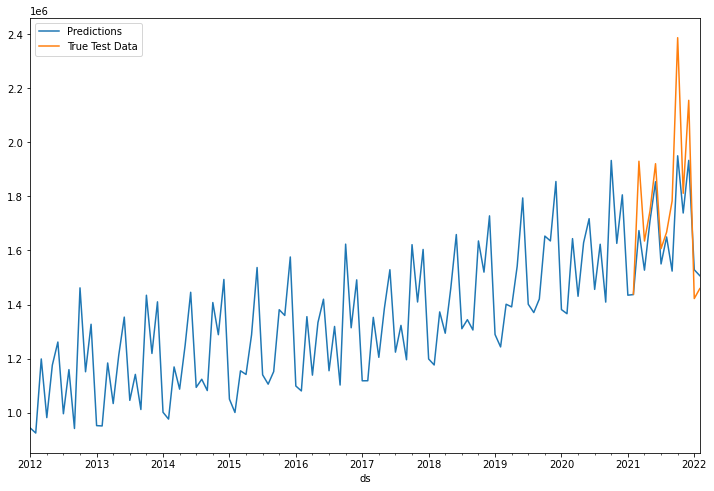

In [52]:
# plot
ax=forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax)

##### A close look of predictions compared to the test set.

<AxesSubplot:xlabel='ds'>

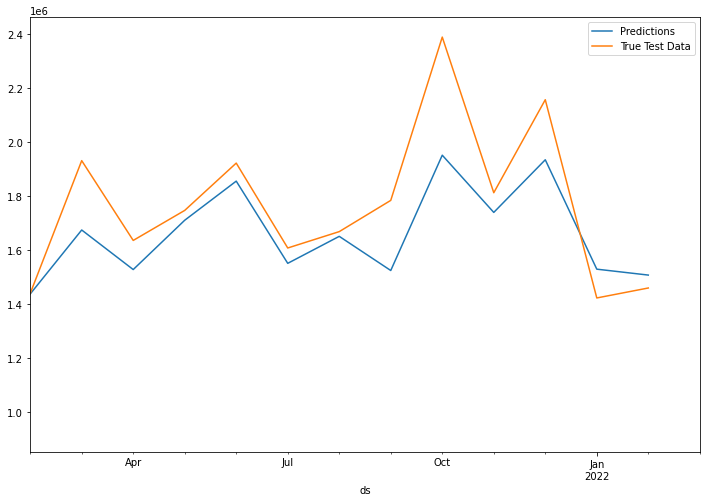

In [53]:
ax=forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2021-02-28','2022-03-28'))#

##### The predictions looks close to the test set!

### b. Accuracy metrics

##### Let's check the `RMSE` accuracy is good.

In [54]:
from statsmodels.tools.eval_measures import rmse

In [57]:
predictions=forecast.iloc[-13:]['yhat']
predictions.head()

109    1.436796e+06
110    1.673506e+06
111    1.527143e+06
112    1.709611e+06
113    1.854289e+06
Name: yhat, dtype: float64

In [56]:
test.head()

,ds,y
109,2021-02-28,1438579.67
110,2021-03-31,1930103.74
111,2021-04-30,1634894.69
112,2021-05-31,1745995.66
113,2021-06-30,1921018.42


In [59]:
# RMSE error
rmse(predictions,test['y'])

178302.10488414697

In [61]:
# ratio of RMSE error and mean of test values
rmse(predictions,test['y'])/test['y'].mean()

0.1009407758462554

##### The ratio `RMSE error`/ `mean of test values` is quite small, showing that the prediction is good! For the other metrics and in a more general frame, I will present in the next section.

### c. Cross validation

In [62]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

##### Our cross validation is based on an `initial` of 3 years, a `period` of 1 year and a `horizon` of 1 year.

In [65]:
# Initial
initial=3*365
initial=str(initial)+' days'
# Period
period=1*365
period=str(period)+' days'
# Horizon
horizon=365
horizon=str(horizon)+' days'

In [66]:
# create cross validation
df_cv=cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-02-02 00:00:00 and 2020-02-01 00:00:00
100%|██████████| 6/6 [00:14<00:00,  2.35s/it]


In [67]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-28,9.332062e+05,8.790425e+05,9.971415e+05,1111362.41,2015-02-02
1,2015-03-31,1.220531e+06,1.163486e+06,1.279063e+06,1415944.70,2015-02-02
2,2015-04-30,1.133766e+06,1.072166e+06,1.192752e+06,1066662.08,2015-02-02
3,2015-05-31,1.094963e+06,1.033220e+06,1.154688e+06,1152225.81,2015-02-02
4,2015-06-30,1.560932e+06,1.501608e+06,1.623316e+06,1748952.75,2015-02-02
...,...,...,...,...,...,...
67,2020-09-30,1.249536e+06,1.084619e+06,1.422613e+06,1712936.40,2020-02-01
68,2020-10-31,1.732862e+06,1.569422e+06,1.908758e+06,2305758.85,2020-02-01
69,2020-11-30,1.571175e+06,1.400036e+06,1.734825e+06,1581773.99,2020-02-01
70,2020-12-31,1.678850e+06,1.519330e+06,1.845964e+06,1903912.37,2020-02-01


In [69]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,57 days,1.224880e+10,110674.317764,85973.324413,0.072825,0.044100,0.075307,0.714286
1,58 days,4.812992e+10,219385.316841,177568.963580,0.127478,0.129787,0.133686,0.285714
2,59 days,4.807220e+10,219253.740314,178131.030817,0.125371,0.129787,0.131922,0.285714
3,87 days,4.871041e+10,220704.353162,186866.310340,0.133696,0.129787,0.139975,0.142857
4,88 days,3.833595e+10,195795.688824,168158.345743,0.143820,0.103156,0.137070,0.285714
5,89 days,2.868920e+10,169378.853315,144153.303535,0.126774,0.101187,0.119000,0.428571
6,118 days,2.865178e+10,169268.374988,143832.900379,0.128594,0.101187,0.120901,0.428571
7,119 days,3.653015e+10,191128.615028,161030.643326,0.114335,0.082869,0.117852,0.464286
8,120 days,3.147259e+10,177405.150350,147470.826284,0.097397,0.071208,0.103178,0.571429
9,148 days,3.564308e+10,188793.738397,163120.219636,0.104872,0.082869,0.111301,0.428571


### d. Trend changes

In [70]:
# check `df`
df.head()

,ds,y
0,2012-01-31,1020862.23
1,2012-02-29,1021760.22
2,2012-03-31,1006995.51
3,2012-04-30,1108185.43
4,2012-05-31,1218569.42


In [72]:
# fit all `df`
m=Prophet()
m.fit(df)

# make a placeholder for future predictions and create a forecast
future=m.make_future_dataframe(periods=12,freq='M')
forecast=m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


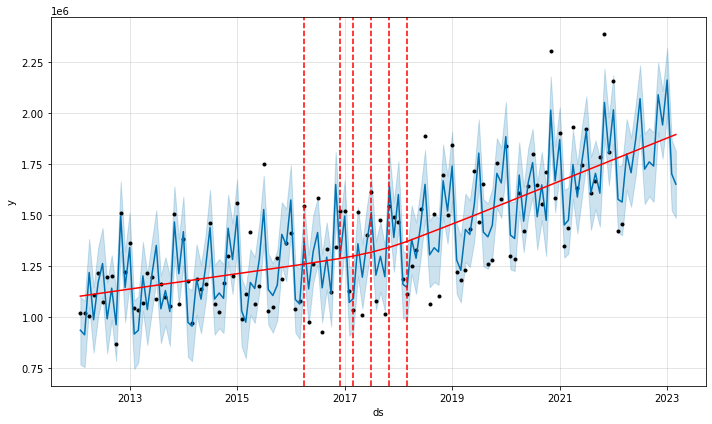

In [74]:
from prophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)

# plot all change points
a=add_changepoints_to_plot(fig.gca(),m,forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


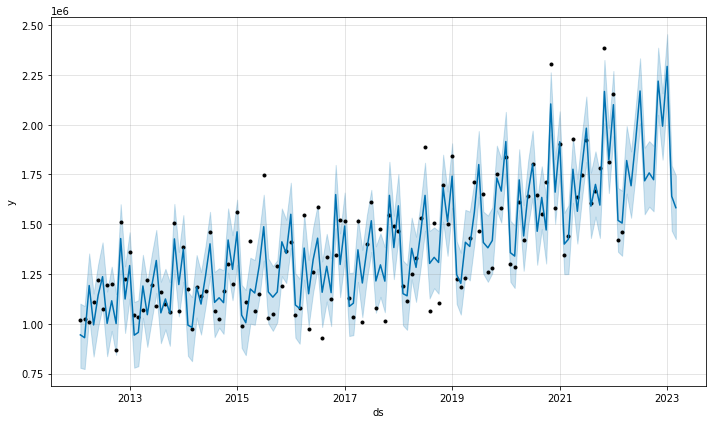

In [ ]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(data1)
future=m.make_future_dataframe(periods=12,freq='M')
forecast=m.predict(future)
fig=m.plot(forecast)

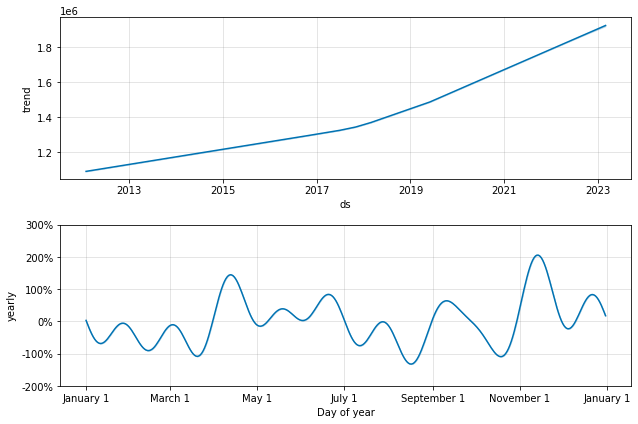

In [ ]:
fig=m.plot_components(forecast)

### e. Parameters tuning

##### In this section, we will use cross validation above to search for best parameters, including `changepoint_prior_scale` and `seasonality_prior_scale`.

In [77]:
import itertools

In [104]:
# check our train set
train.head()

,ds,y
0,2012-01-31,1020862.23
1,2012-02-29,1021760.22
2,2012-03-31,1006995.51
3,2012-04-30,1108185.43
4,2012-05-31,1218569.42


In [106]:
# fit train set to `Prophet` object 
m=Prophet()
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train)  # Fit model with given params
    #df_cv = cross_validation(m, cutoffs=cutoffs, horizon=horizon, parallel="processes")
    df_cv=cross_validation(m,initial=initial,period=period,horizon=horizon)
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 6 forecasts with cutoffs between 2015-02-02 00:00:00 and 2020-02-01 00:00:00
100%|██████████| 6/6 [00:26<00:00,  4.37s/it]
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 6 forecasts with cutoffs between 2015-02-02 00:00:00 and 2020-02-01 00:00:00
100%|██████████| 6/6 [00:22<00:00,  3.71s/it]
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 6 forecasts with cutoffs between 2015-02-02 00:00:00 and 2020-02-01 00:00:00
100%|██████

In [105]:
# print out best parameters
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1}


##### Now it is time to check back our model with the found paramters.

In [110]:
m=Prophet(changepoint_prior_scale= 0.5, seasonality_prior_scale=0.1)
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<AxesSubplot:xlabel='ds'>

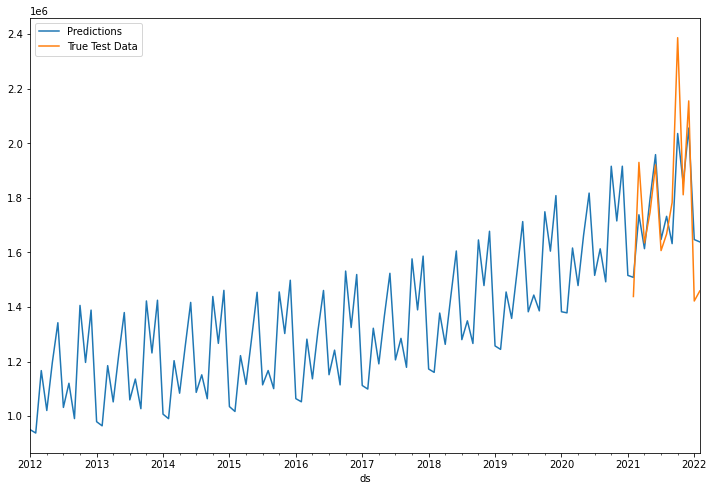

In [111]:
# create a placeholder of future predictions
future=m.make_future_dataframe(periods=len(test),freq='M')

# make forecast
forecast=m.predict(future)

# plot
ax=forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax)#,xlim=('2021-02-28','2022-02-01')

In [114]:
predictions=forecast.iloc[-13:]['yhat']
predictions

109    1.508725e+06
110    1.738174e+06
111    1.613881e+06
112    1.795679e+06
113    1.958617e+06
114    1.647425e+06
115    1.732469e+06
116    1.632374e+06
117    2.036029e+06
118    1.853991e+06
119    2.056055e+06
120    1.647306e+06
121    1.638689e+06
Name: yhat, dtype: float64

In [113]:
# RMSE error
rmse(predictions,test['y'])
#178302.10488414697

150059.69726651386

##### The `RMSE` error is clearly improved, noting that the previous one is 178302.10488414697

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb855f0b-5d5f-43d2-a9d9-b4b5150d059e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>